# Student Peformance Problem

### Dataset Information

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details).

### Dataset Attributes

##### Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1. school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. sex - student's sex (binary: 'F' - female or 'M' - male)
3. age - student's age (numeric: from 15 to 22)
4. address - student's home address type (binary: 'U' - urban or 'R' - rural)
5. famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6. Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7. Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
8. Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
9. Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10. Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11. reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93)

##### these grades are related with the course subject, Math or Portuguese:
31. G1 - first period grade (numeric: from 0 to 20)
31. G2 - second period grade (numeric: from 0 to 20)
32. G3 - final grade (numeric: from 0 to 20, output target)

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
# read math and portugese data
math_data = pd.read_csv("../student-mat.csv", delimiter= ";")
por_data = pd.read_csv("../student-por.csv",delimiter= ";") 

In [4]:
por_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


### Relationship feature and target

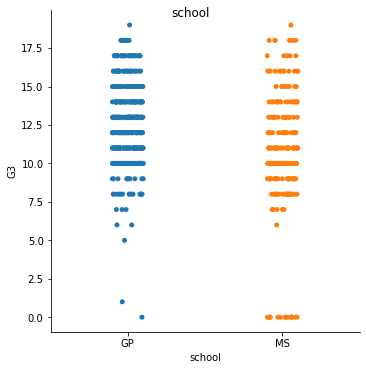

In [5]:
# School has more student in higer G3
sea.catplot(x="school", y="G3", data=por_data)
plt.suptitle("school")
plt.show()

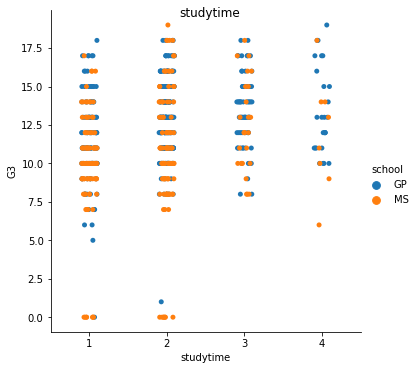

In [6]:
# Studytime impact to G3
feature = "studytime"
target = "G3"

sea.catplot(x=feature,y=target, hue="school", data=por_data)
plt.suptitle(feature)
plt.show()

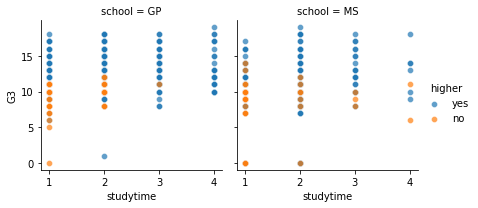

In [7]:
# Motivation impact to G3
g = sea.FacetGrid(por_data, col="school", hue="higher")
g.map(sea.scatterplot, "studytime", "G3", alpha=.7)
g.add_legend()

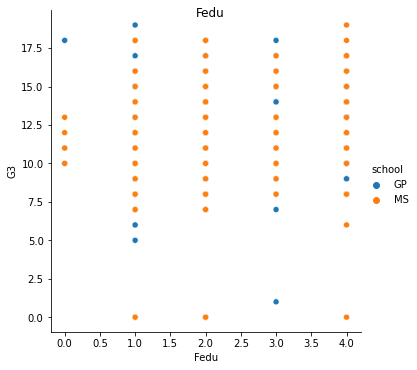

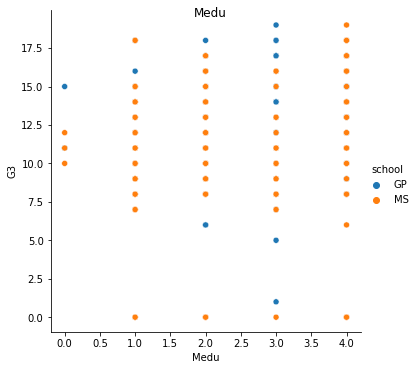

In [8]:
# Parent Education impact to G3
feature = "Fedu"
target = "G3"

sea.relplot(x=feature,y=target, hue="school", data=por_data)
plt.suptitle(feature)
plt.show()

feature = "Medu"
target = "G3"


sea.relplot(x=feature,y=target, hue="school", data=por_data)
plt.suptitle(feature)
plt.show()

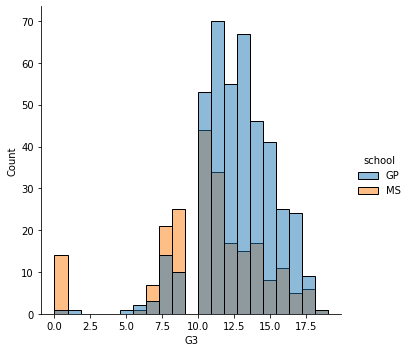

In [9]:
# Distribution of G3
sea.displot(por_data, x="G3", hue="school")

In [10]:
copy_data = por_data.copy()
copy_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [11]:
# mapping yes/no feature to 1/0
mapping = {"yes":1,"no":0}
copy_data["schoolsup"] = copy_data["schoolsup"].map(mapping)
copy_data["famsup"] = copy_data["famsup"].map(mapping)
copy_data["paid"] = copy_data["paid"].map(mapping)
copy_data["activities"] = copy_data["activities"].map(mapping)
copy_data["nursery"] = copy_data["nursery"].map(mapping)
copy_data["higher"] = copy_data["higher"].map(mapping)
copy_data["internet"] = copy_data["internet"].map(mapping)
copy_data["romantic"] = copy_data["romantic"].map(mapping)
copy_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,1,0,0,0,1,1,1,0,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,0,1,0,1,1,1,1,1,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,0,1,0,0,1,1,0,0,4,3,2,1,2,5,0,11,13,13


In [12]:
# mapping other feature that has 2 values
mapping = {"F":1, "M":0}
copy_data["sex"] = copy_data["sex"].map(mapping)

mapping = {"U":1, "R":0}
copy_data["address"] = copy_data["address"].map(mapping)

mapping = {"GT3":1, "LE3":0}
copy_data["famsize"] = copy_data["famsize"].map(mapping)

mapping = {"A":1, "T":0}
copy_data["Pstatus"] = copy_data["Pstatus"].map(mapping)

In [13]:
# mapping feature with 3 values
mapping = {"other":3, "father":2, "mother":1}
copy_data["guardian"] = copy_data["guardian"].map(mapping)
copy_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,1,18,1,1,1,4,4,at_home,teacher,course,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,4,0,11,11
1,GP,1,17,1,1,0,1,1,at_home,other,course,2,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,9,11,11
2,GP,1,15,1,0,0,1,1,at_home,other,other,1,1,2,0,1,0,0,0,1,1,1,0,4,3,2,2,3,3,6,12,13,12
3,GP,1,15,1,1,0,4,2,health,services,home,1,1,3,0,0,1,0,1,1,1,1,1,3,2,2,1,1,5,0,14,14,14
4,GP,1,16,1,1,0,3,3,other,other,home,2,1,2,0,0,1,0,0,1,1,0,0,4,3,2,1,2,5,0,11,13,13


In [14]:
# mapping feature with 4 values
mapping = {"other":4, "course":3, "reputation":2, "home":1}
copy_data["reason"] = copy_data["reason"].map(mapping)
copy_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,1,18,1,1,1,4,4,at_home,teacher,3,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,4,0,11,11
1,GP,1,17,1,1,0,1,1,at_home,other,3,2,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,9,11,11
2,GP,1,15,1,0,0,1,1,at_home,other,4,1,1,2,0,1,0,0,0,1,1,1,0,4,3,2,2,3,3,6,12,13,12
3,GP,1,15,1,1,0,4,2,health,services,1,1,1,3,0,0,1,0,1,1,1,1,1,3,2,2,1,1,5,0,14,14,14
4,GP,1,16,1,1,0,3,3,other,other,1,2,1,2,0,0,1,0,0,1,1,0,0,4,3,2,1,2,5,0,11,13,13


In [15]:
# mapping feature with 5 values
mapping = {"other":5, "at_home":4, "services":3, "health":2, "teacher":1}
copy_data["Mjob"] = copy_data["Mjob"].map(mapping)
copy_data.head()

copy_data["Fjob"] = copy_data["Fjob"].map(mapping)
copy_data.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,1,18,1,1,1,4,4,4,1,3,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,4,0,11,11
1,GP,1,17,1,1,0,1,1,4,5,3,2,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,9,11,11
2,GP,1,15,1,0,0,1,1,4,5,4,1,1,2,0,1,0,0,0,1,1,1,0,4,3,2,2,3,3,6,12,13,12
3,GP,1,15,1,1,0,4,2,2,3,1,1,1,3,0,0,1,0,1,1,1,1,1,3,2,2,1,1,5,0,14,14,14
4,GP,1,16,1,1,0,3,3,5,5,1,2,1,2,0,0,1,0,0,1,1,0,0,4,3,2,1,2,5,0,11,13,13


In [60]:
filtered_2_values_data = copy_data.filter(["sex","address","famsize","Pstatus","schoolsup","famsup","paid","activities","nursery","higher","internet","romantic","G1","G2","G3"])

In [61]:
filtered_more_than_2_values_data = copy_data.filter(["Medu","Fedu","Mjob","Fjob","reason","guardian","traveltime","studytime","failures","famrel","freetime","goout","Dalc","Walc","health","G1","G2","G3"])

In [62]:
filtered_2_values_data.describe()

,sex,address,famsize,Pstatus,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,0.590139,0.696456,0.704160,0.123267,0.104777,0.613251,0.060092,0.485362,0.802773,0.893683,0.767334,0.368259,11.399076,11.570108,11.906009
std,0.492187,0.460143,0.456771,0.328996,0.306502,0.487381,0.237841,0.500171,0.398212,0.308481,0.422857,0.482704,2.745265,2.913639,3.230656
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,10.000000,10.000000,10.000000
50%,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,11.000000,12.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.000000,13.000000,14.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000,19.000000,19.000000


In [63]:
filtered_more_than_2_values_data.describe()

,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,2.514638,2.306626,3.707242,4.049307,2.431433,1.362096,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,11.399076,11.570108,11.906009
std,1.134552,1.099931,1.348511,1.218696,0.963211,0.598232,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,2.745265,2.913639,3.230656
min,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,3.000000,3.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,10.000000,10.000000,10.000000
50%,2.000000,2.000000,4.000000,5.000000,3.000000,1.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,11.000000,11.000000,12.000000
75%,4.000000,3.000000,5.000000,5.000000,3.000000,2.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,13.000000,13.000000,14.000000
max,4.000000,4.000000,5.000000,5.000000,4.000000,3.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,19.000000,19.000000,19.000000


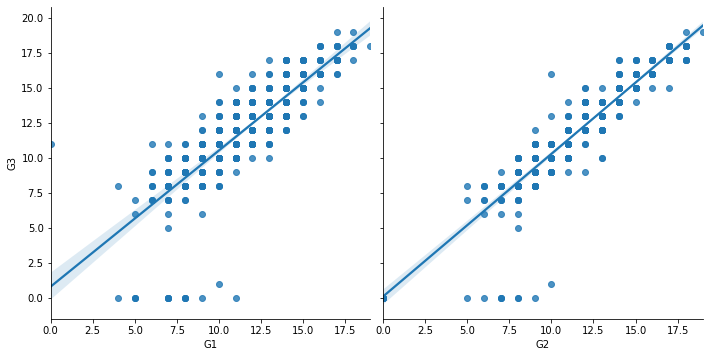

In [69]:
sea.pairplot(filtered_2_values_data, x_vars=["G1","G2"], y_vars='G3', height=5, aspect=1, kind='reg')

In [85]:
def plot_feature_target(model,features):
    for i in range(2,len(features),3):
        sea.pairplot(model, x_vars=[features[i-2],features[i-1],features[i]], y_vars='G3', height=3, aspect=0.7)
    plt.show()

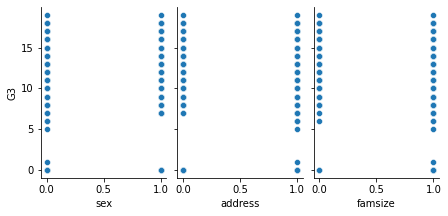

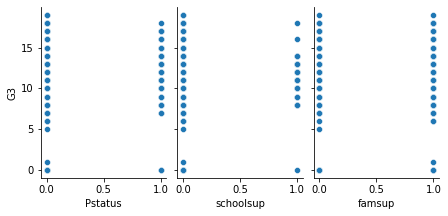

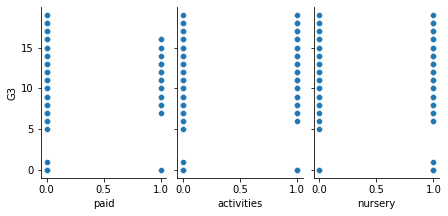

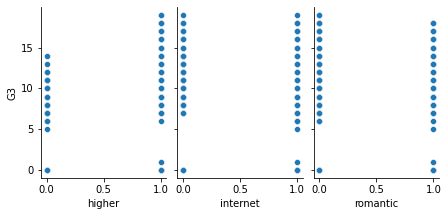

In [87]:
plot_feature_target(filtered_2_values_data,["sex","address","famsize","Pstatus","schoolsup","famsup","paid","activities","nursery","higher","internet","romantic"])

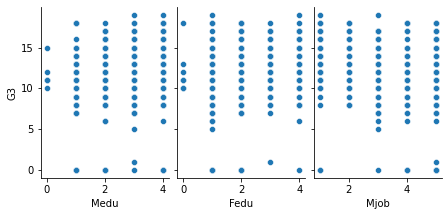

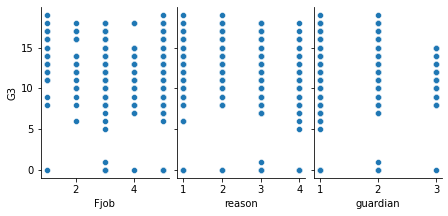

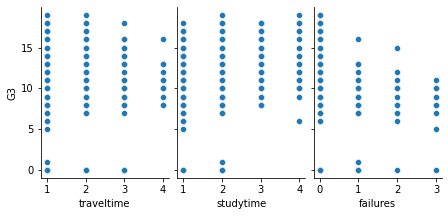

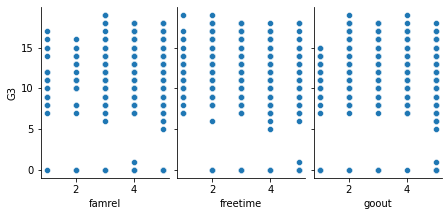

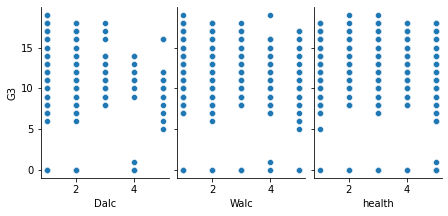

In [103]:
plot_feature_target(filtered_more_than_2_values_data,["Medu","Fedu","Mjob","Fjob","reason","guardian","traveltime","studytime","failures","famrel","freetime","goout","Dalc","Walc","health"])

In [107]:
filtered_2_values_data = copy_data.filter(["sex","address","famsize","Pstatus","schoolsup","famsup","paid","activities","nursery","higher","internet","romantic","G1","G2"])
filtered_more_than_2_values_data = copy_data.filter(["Medu","Fedu","Mjob","Fjob","reason","guardian","traveltime","studytime","failures","famrel","freetime","goout","Dalc","Walc","health","G1","G2"])

## Train each model using Linear Regression

In [108]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### 2 values model

In [109]:
X_train, X_test, y_train, y_test = train_test_split(filtered_2_values_data, target)

In [110]:
model = LinearRegression()
model.fit(X_train, y_train)
# make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluatin using Root Mean Squared Error

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [111]:
from sklearn import metrics

### Computing RMSE for our Student predictions

In [112]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.3738840180460605


### More than 2 values model

In [113]:
X_train, X_test, y_train, y_test = train_test_split(filtered_more_than_2_values_data, target)
model = LinearRegression()
model.fit(X_train, y_train)
# make predictions on the testing set
y_pred = model.predict(X_test)

In [114]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.5386945652292812


1. The RMSE **decreased** when we use more than 2 values model. (Error is something we want to minimize, so **a lower number for RMSE is better**.)

2. We need to really know what feature should we use.

In [115]:
# Both model without G1 and G2
filtered_2_values_data = copy_data.filter(["sex","address","famsize","Pstatus","schoolsup","famsup","paid","activities","nursery","higher","internet","romantic"])
filtered_more_than_2_values_data = copy_data.filter(["Medu","Fedu","Mjob","Fjob","reason","guardian","traveltime","studytime","failures","famrel","freetime","goout","Dalc","Walc","health"])

In [116]:
X_train, X_test, y_train, y_test = train_test_split(filtered_2_values_data, target)
model = LinearRegression()
model.fit(X_train, y_train)
# make predictions on the testing set
y_pred = model.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

X_train, X_test, y_train, y_test = train_test_split(filtered_more_than_2_values_data, target)
model = LinearRegression()
model.fit(X_train, y_train)
# make predictions on the testing set
y_pred = model.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

2.816197080018407
2.8286088124730875
